<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week9.do.txt --no_mako -->
<!-- dom:TITLE: Advanced machine learning and data analysis for the physical sciences -->

# Advanced machine learning and data analysis for the physical sciences
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway

Date: **March 20, 2025**

## Plans for the week March 17-21

1. Discussion of Autoencoders (AEs) and reminder from last week

2. Links between Principal Component Analysis (PCA) and AE
<!-- o [Video of Lecture](https://youtu.be/PU_8riCscQg) -->
<!-- o [Whiteboard notes](https://github.com/CompPhysics/AdvancedMachineLearning/blob/main/doc/HandwrittenNotes/2024/NotesMarch12.pdf) -->

## Reading recommendations

1. Goodfellow et al chapter 14.

2. Rashcka et al. Their chapter 17 contains a brief introduction only.

3. Deep Learning Tutorial on AEs from Stanford University at <http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/>

4. Building AEs in Keras at <https://blog.keras.io/building-autoencoders-in-keras.html>

5. Introduction to AEs in TensorFlow at <https://www.tensorflow.org/tutorials/generative/autoencoder>

6. Grosse, University of Toronto, Lecture on AEs at <http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec20.pdf>

7. Bank et al on AEs at <https://arxiv.org/abs/2003.05991>  

8. Baldi and Hornik, Neural networks and principal component analysis: Learning from examples without local minima, Neural Networks 2, 53 (1989)

## Autoencoders: Overarching view

Autoencoders are artificial neural networks capable of learning
efficient representations of the input data (these representations are called codings)  without
any supervision (i.e., the training set is unlabeled). These codings
typically have a much lower dimensionality than the input data, making
autoencoders useful for dimensionality reduction. 

Autoencoders learn to encode the
input data into a lower-dimensional representation, and then decode it
back to the original data. The goal of autoencoders is to minimize the
reconstruction error, which measures how well the output matches the
input. Autoencoders can be seen as a way of learning the latent
features or hidden structure of the data, and they can be used for
data compression, denoising, anomaly detection, and generative
modeling.

## Powerful detectors

More importantly, autoencoders act as powerful feature detectors, and
they can be used for unsupervised pretraining of deep neural networks.

Lastly, they are capable of randomly generating new data that looks
very similar to the training data; this is called a generative
model. For example, you could train an autoencoder on pictures of
faces, and it would then be able to generate new faces.  Surprisingly,
autoencoders work by simply learning to copy their inputs to their
outputs. This may sound like a trivial task, but we will see that
constraining the network in various ways can make it rather
difficult. For example, you can limit the size of the internal
representation, or you can add noise to the inputs and train the
network to recover the original inputs. These constraints prevent the
autoencoder from trivially copying the inputs directly to the outputs,
which forces it to learn efficient ways of representing the data. In
short, the codings are byproducts of the autoencoder’s attempt to
learn the identity function under some constraints.

## First introduction of AEs

Autoencoders were first introduced by Rumelhart, Hinton, and Williams
in 1986 with the goal of learning to reconstruct the input
observations with the lowest error possible.

Why would one want to learn to reconstruct the input observations? If
you have problems imagining what that means, think of having a dataset
made of images. An autoencoder would be an algorithm that can give as
output an image that is as similar as possible to the input one. You
may be confused, as there is no apparent reason of doing so. To better
understand why autoencoders are useful we need a more informative
(although not yet unambiguous) definition.

An autoencoder is a type of algorithm with the primary purpose of learning an "informative" representation of the data that can be used for different applications ([see Bank, D., Koenigstein, N., and Giryes, R., Autoencoders](https://arxiv.org/abs/2003.05991)) by learning to reconstruct a set of input observations well enough.

## Autoencoder structure

Autoencoders are neural networks where the outputs are its own
inputs. They are split into an **encoder part**
which maps the input $\boldsymbol{x}$ via a function $f(\boldsymbol{x},\boldsymbol{W})$ (this
is the encoder part) to a **so-called code part** (or intermediate part)
with the result $\boldsymbol{h}$

$$
\boldsymbol{h} = f(\boldsymbol{x},\boldsymbol{W})),
$$

where $\boldsymbol{W}$ are the weights to be determined.  The **decoder** parts maps, via its own parameters (weights given by the matrix $\boldsymbol{V}$ and its own biases) to 
the final ouput

$$
\tilde{\boldsymbol{x}} = g(\boldsymbol{h},\boldsymbol{V})).
$$

The goal is to minimize the construction error.

## Schematic image of an Autoencoder

<!-- dom:FIGURE: [figures/ae1.png, width=700 frac=1.0] -->
<!-- begin figure -->

<img src="figures/ae1.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## More on the structure

In most typical architectures, the encoder and the decoder are neural networks
since they can be easily trained with existing software libraries such as TensorFlow or PyTorch with back propagation.

In general, the encoder can be written as a function $g$ that will depend on some parameters

$$
\mathbf{h}_{i} = g(\mathbf{x}_{i}),
$$

where $\mathbf{h}_{i}\in\mathbb{R}^{q}$  (the latent feature representation) is the output of the encoder block where we evaluate
it using the input $\mathbf{x}_{i}$.

## Decoder part

Note that we have $g:\mathbb{R}^{n}\rightarrow\mathbb{R}^{q}$
The decoder and the output of the network $\tilde{\mathbf{x}}_{i}$ can be written then as a second generic function
of the latent features

$$
\tilde{\mathbf{x}}_{i} = f\left(\mathbf{h}_{i}\right) = f\left(g\left(\mathbf{x}_{i}\right)\right),
$$

where $\tilde{\mathbf{x}}_{i}\mathbf{\in }\mathbb{R}^{n}$.

Training an autoencoder simply means finding the functions $g(\cdot)$ and $f(\cdot)$
that satisfy

$$
\textrm{arg}\min_{f,g}<\left[\Delta (\mathbf{x}_{i}, f(g\left(\mathbf{x}_{i}\right))\right]>.
$$

## Typical AEs

The standard setup is done via a standard feed forward neural network (FFNN), or what is called a Feed Forward Autoencoder.

A typical FFNN architecture has an odd number of layers and is symmetrical with respect to the middle layer.

Typically, the first layer has a number of neurons $n_{1} = n$ which equals the size of the input observation $\mathbf{x}_{\mathbf{i}}$.

As we move toward the center of the network, the number of neurons in each layer drops in some measure.
The middle layer usually has the smallest number of neurons.
The fact that the number of neurons in this layer is smaller than the size of the input, is often called the **bottleneck**.

## Feed Forward Autoencoder

<!-- dom:FIGURE: [figures/ae2.png, width=700 frac=1.0] -->
<!-- begin figure -->

<img src="figures/ae2.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Mirroring

In almost all practical applications,
the layers after the middle one are a mirrored version of the layers before the middle one.
For example, an autoencoder with three layers could have the following numbers of neurons:

$n_{1} = 10$, $n_{2} = 5$ and then $n_{3} = n_{1} = 10$ where the input dimension is equal to ten.

All the layers up to and including the middle one, make what is called the encoder, and all the layers from and including
the middle one (up to the output) make what is called the decoder.

If the FFNN training is successful, the result will
be a good approximation of the input $\tilde{\mathbf{x}}_{i}\approx\mathbf{x}_{i}$.

What is essential to notice is that the decoder can reconstruct the
input by using only a much smaller number of features than the input
observations initially have.

## Output of middle layer

The output of the middle layer
$\mathbf{h}_{\mathbf{i}}$ are also called a **learned representation** of the input observation $\mathbf{x}_{i}$.

The encoder can reduce the number of dimensions of the input
observation and create a learned representation
$\mathbf{h}_{\mathbf{i}}\mathbf{) }$ of the input that has a smaller
dimension $q<n$.

This learned representation is enough for the decoder to reconstruct
the input accurately (if the autoencoder training was successful as
intended).

## Activation Function of the Output Layer

In autoencoders based on neural networks, the output layer's
activation function plays a particularly important role.  The most
used functions are ReLU and Sigmoid.

## ReLU

The  ReLU activation function can assume all values in the range $\left[0,\infty\right]$. As a remainder, its formula is

$$
\textrm{ReLU}\left(x\right) = \max\left(0,x\right).
$$

This choice is good when the input observations \(\mathbf{x}_{i}\) assume a wide range of positive values.
If the input $\mathbf{x}_{i}$ can assume negative values, the ReLU is, of course, a terrible choice, and the identity function is a much better choice. It is then common to replace to the ReLU with the so-called **Leaky ReLu** or just modified ReLU.

The ReLU activation function for the output layer is well suited for cases when the input observations \(\mathbf{x}_{i}\) assume a wide range of positive real values.

## Sigmoid

The sigmoid function $\sigma$ can assume all values in the range $[0,1]$,

$$
\sigma\left(x\right) =\frac{1}{1+e^{-x}}.
$$

This activation function can only be used if the input observations
$\mathbf{x}_{i}$ are all in the range $[0,1]$  or if you have
normalized them to be in that range. Consider as an example the MNIST
dataset. Each value of the input observation $\mathbf{x}_{i}$ (one
image) is the gray values of the pixels that can assume any value from
0 to 255. Normalizing the data by dividing the pixel values by 255
would make each observation (each image) have only pixel values
between 0 and 1. In this case, the sigmoid would be a good choice for
the output layer's activation function.

## Cost/Loss Function

If an autoencoder is trying to solve a regression problem, the most
common choice as a loss function is the Mean Square Error

$$
L_{\textrm{MSE}} = \textrm{MSE} = \frac{1}{n}\sum_{i = 1}^{n}\left\vert\vert\mathbf{x}_{i}-\tilde{\mathbf{x}}_{i}\right\vert\vert^{2}_2.
$$

## Binary Cross-Entropy

If the activation function of the output layer of the AE is a sigmoid
function, thus limiting neuron outputs to be between 0 and 1, and the
input features are normalized to be between 0 and 1 we can use as loss
function the binary cross-entropy. This cots/loss function is
typically used in classification problems, but it works well for
autoencoders. The formula for it is

$$
L_{\textrm{CE}} = -\frac{1}{n}\sum_{i = 1}^{n}\sum_{j = 1}^{p}[x_{j,i} \log\tilde{x}_{j,i}+\left(1-x_{j,i}\right)\log (1-\tilde{x}_{j,i})].
$$

## Reconstruction Error

The reconstruction error (RE) is a metric that gives you an indication of how good (or bad) the autoencoder was able to reconstruct
the input observation $\mathbf{x}_{i}$. The most typical RE used is the MSE

$$
\textrm{RE}\equiv \textrm{MSE} = \frac{1}{n}\sum_{i = 1}^{n}\left\vert\vert\mathbf{x}_{i}-\tilde{\mathbf{x}}_{i}\right\vert\vert^{2}_2.
$$

## Towards the PCA theorem

We have from last week that the covariance matrix (the correlation matrix involves a simple rescaling) is given as

$$
\boldsymbol{C}[\boldsymbol{x}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}= \mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}].
$$

Let us now assume that we can perform a series of orthogonal transformations where we employ some orthogonal matrices $\boldsymbol{S}$.
These matrices are defined as $\boldsymbol{S}\in {\mathbb{R}}^{p\times p}$ and obey the orthogonality requirements $\boldsymbol{S}\boldsymbol{S}^T=\boldsymbol{S}^T\boldsymbol{S}=\boldsymbol{I}$. The matrix can be written out in terms of the column vectors $\boldsymbol{s}_i$ as $\boldsymbol{S}=[\boldsymbol{s}_0,\boldsymbol{s}_1,\dots,\boldsymbol{s}_{p-1}]$ and $\boldsymbol{s}_i \in {\mathbb{R}}^{p}$.

## More details

Assume also that there is a transformation $\boldsymbol{S}^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S}=\boldsymbol{C}[\boldsymbol{y}]$ such that the new matrix $\boldsymbol{C}[\boldsymbol{y}]$ is diagonal with elements $[\lambda_0,\lambda_1,\lambda_2,\dots,\lambda_{p-1}]$.  

That is we have

$$
\boldsymbol{C}[\boldsymbol{y}] = \mathbb{E}[\boldsymbol{S}^T\boldsymbol{X}^T\boldsymbol{X}T\boldsymbol{S}]=\boldsymbol{S}^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S},
$$

since the matrix $\boldsymbol{S}$ is not a data dependent matrix.   Multiplying with $\boldsymbol{S}$ from the left we have

$$
\boldsymbol{S}\boldsymbol{C}[\boldsymbol{y}] = \boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S},
$$

and since $\boldsymbol{C}[\boldsymbol{y}]$ is diagonal we have for a given eigenvalue $i$ of the covariance matrix that

$$
\boldsymbol{S}_i\lambda_i = \boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S}_i.
$$

## More on the PCA Theorem

In the derivation of the PCA theorem we will assume that the eigenvalues are ordered in descending order, that is
$\lambda_0 > \lambda_1 > \dots > \lambda_{p-1}$. 

The eigenvalues tell us then how much we need to stretch the
corresponding eigenvectors. Dimensions with large eigenvalues have
thus large variations (large variance) and define therefore useful
dimensions. The data points are more spread out in the direction of
these eigenvectors.  Smaller eigenvalues mean on the other hand that
the corresponding eigenvectors are shrunk accordingly and the data
points are tightly bunched together and there is not much variation in
these specific directions. Hopefully then we could leave it out
dimensions where the eigenvalues are very small. If $p$ is very large,
we could then aim at reducing $p$ to $l << p$ and handle only $l$
features/predictors.

## The Algorithm before theorem

Here's how we would proceed in setting up the algorithm for the PCA, see also discussion below here. 
* Set up the datapoints for the design/feature matrix $\boldsymbol{X}$ with $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors/features $p$  referring to the column numbers and the entries $n$ being the row elements.

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix},
$$

## Further steps

* Center the data by subtracting the mean value for each column. This leads to a new matrix $\boldsymbol{X}\rightarrow \overline{\boldsymbol{X}}$.

* Compute then the covariance/correlation matrix $\mathbb{E}[\overline{\boldsymbol{X}}^T\overline{\boldsymbol{X}}]$.

* Find the eigenpairs of $\boldsymbol{C}$ with eigenvalues $[\lambda_0,\lambda_1,\dots,\lambda_{p-1}]$ and eigenvectors $[\boldsymbol{s}_0,\boldsymbol{s}_1,\dots,\boldsymbol{s}_{p-1}]$.

* Order the eigenvalue (and the eigenvectors accordingly) in order of decreasing eigenvalues.

* Keep only those $l$ eigenvalues larger than a selected threshold value, discarding thus $p-l$ features since we expect small variations in the data here.

## Writing our own PCA code

We will use a simple example first with two-dimensional data
drawn from a multivariate normal distribution with the following mean and covariance matrix (we have fixed these quantities but will play around with them below):

$$
\mu = (-1,2) \qquad \Sigma = \begin{bmatrix} 4 & 2 \\
2 & 2
\end{bmatrix}
$$

Note that the mean refers to each column of data. 
We will generate $n = 10000$ points $X = \{ x_1, \ldots, x_N \}$ from
this distribution, and store them in the $1000 \times 2$ matrix $\boldsymbol{X}$. This is our design matrix where we have forced the covariance and mean values to take specific values.

## Implementing it
The following Python code aids in setting up the data and writing out the design matrix.
Note that the function **multivariate** returns also the covariance discussed above and that it is defined by dividing by $n-1$ instead of $n$.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
n = 10000
mean = (-1, 2)
cov = [[4, 2], [2, 2]]
X = np.random.multivariate_normal(mean, cov, n)

Now we are going to implement the PCA algorithm. We will break it down into various substeps.

## First Step

The first step of PCA is to compute the sample mean of the data and use it to center the data. Recall that the sample mean is

$$
\mu_n = \frac{1}{n} \sum_{i=1}^n x_i
$$

and the mean-centered data $\bar{X} = \{ \bar{x}_1, \ldots, \bar{x}_n \}$ takes the form

$$
\bar{x}_i = x_i - \mu_n.
$$

When you are done with these steps, print out $\mu_n$ to verify it is
close to $\mu$ and plot your mean centered data to verify it is
centered at the origin! 
The following code elements perform these operations using **pandas** or using our own functionality for doing so. The latter, using **numpy** is rather simple through the **mean()** function.

In [2]:
df = pd.DataFrame(X)
# Pandas does the centering for us
df = df -df.mean()
# we center it ourselves
X_centered = X - X.mean(axis=0)

## Scaling
Alternatively, we could use the functions we discussed
earlier for scaling the data set.  That is, we could have used the
**StandardScaler** function in **Scikit-Learn**, a function which ensures
that for each feature/predictor we study the mean value is zero and
the variance is one (every column in the design/feature matrix).  You
would then not get the same results, since we divide by the
variance. The diagonal covariance matrix elements will then be one,
while the non-diagonal ones need to be divided by $2\sqrt{2}$ for our
specific case.

## Centered Data

Now we are going to use the mean centered data to compute the sample covariance of the data by using the following equation

$$
\Sigma_n = \frac{1}{n-1} \sum_{i=1}^n \bar{x}_i^T \bar{x}_i = \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu_n)^T (x_i - \mu_n)
$$

where the data points $x_i \in \mathbb{R}^p$ (here in this example $p = 2$) are column vectors and $x^T$ is the transpose of $x$.
We can write our own code or simply use either the functionaly of **numpy** or that of **pandas**, as follows

In [3]:
print(df.cov())
print(np.cov(X_centered.T))

          0         1
0  4.071271  2.016926
1  2.016926  1.998664
[[4.07127065 2.01692606]
 [2.01692606 1.99866374]]


Note that the way we define the covariance matrix here has a factor $n-1$ instead of $n$. This is included in the **cov()** function by **numpy** and **pandas**. 
Our own code here is not very elegant and asks for obvious improvements. It is tailored to this specific $2\times 2$ covariance matrix.

Centered covariance using own code
[[4.07127065 2.01692606]
 [2.01692606 1.99866374]]


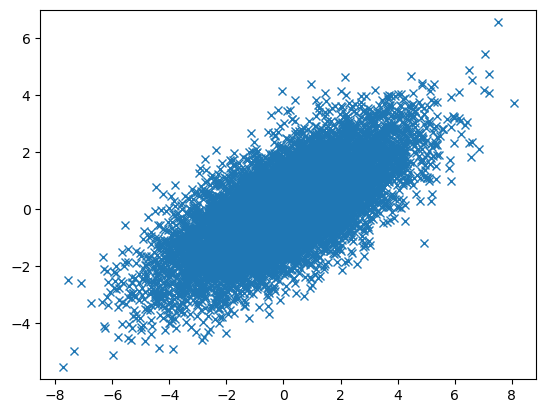

In [4]:
# extract the relevant columns from the centered design matrix of dim n x 2
x = X_centered[:,0]
y = X_centered[:,1]
Cov = np.zeros((2,2))
Cov[0,1] = np.sum(x.T@y)/(n-1.0)
Cov[0,0] = np.sum(x.T@x)/(n-1.0)
Cov[1,1] = np.sum(y.T@y)/(n-1.0)
Cov[1,0]= Cov[0,1]
print("Centered covariance using own code")
print(Cov)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Exploring

Depending on the number of points $n$, we will get results that are close to the covariance values defined above.
The plot shows how the data are clustered around a line with slope close to one. Is this expected?  Try to change the covariance and the mean values. For example, try to make the variance of the first element much larger than that of the second diagonal element. Try also to shrink the covariance  (the non-diagonal elements) and see how the data points are distributed.

## Diagonalize the sample covariance matrix to obtain the principal components

Now we are ready to solve for the principal components! To do so we
diagonalize the sample covariance matrix $\Sigma$. We can use the
function **np.linalg.eig** to do so. It will return the eigenvalues and
eigenvectors of $\Sigma$. Once we have these we can perform the 
following tasks:

* We compute the percentage of the total variance captured by the first principal component

* We plot the mean centered data and lines along the first and second principal components

* Then we project the mean centered data onto the first and second principal components, and plot the projected data. 

* Finally, we approximate the data as

$$
x_i \approx \tilde{x}_i = \mu_n + \langle x_i, v_0 \rangle v_0
$$

where $v_0$ is the first principal component.

## Collecting all Steps

Collecting all these steps we can write our own PCA function and
compare this with the functionality included in **Scikit-Learn**.  

The code here outlines some of the elements we could include in the
analysis. Feel free to extend upon this in order to address the above
questions.

In [5]:
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Cov)
# sort eigenvectors and eigenvalues
#permute = EigValues.argsort()
#EigValues = EigValues[permute]
#EigVectors = EigVectors[:,permute]
print("Eigenvalues of Covariance matrix")
for i in range(2):
    print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
print("First eigenvector")
print(FirstEigvector)
print("Second eigenvector")
print(SecondEigvector)
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2Dsl = pca.fit_transform(X)
print("Eigenvector of largest eigenvalue")
print(pca.components_.T[:, 0])

Eigenvalues of Covariance matrix
5.3025464322644975
0.767387960878935
First eigenvector
[0.85352466 0.52105244]
Second eigenvector
[-0.52105244  0.85352466]
Eigenvector of largest eigenvalue
[0.85352466 0.52105244]


This code does not contain all the above elements, but it shows how we can use **Scikit-Learn** to extract the eigenvector which corresponds to the largest eigenvalue. Try to address the questions we pose before the above code.  Try also to change the values of the covariance matrix by making one of the diagonal elements much larger than the other. What do you observe then?

## Classical PCA Theorem

We assume now that we have a design matrix $\boldsymbol{X}$ which has been
centered as discussed above. For the sake of simplicity we skip the
overline symbol. The matrix is defined in terms of the various column
vectors $[\boldsymbol{x}_0,\boldsymbol{x}_1,\dots, \boldsymbol{x}_{p-1}]$ each with dimension
$\boldsymbol{x}\in {\mathbb{R}}^{n}$.

The PCA theorem states that minimizing the above reconstruction error
corresponds to setting $\boldsymbol{W}=\boldsymbol{S}$, the orthogonal matrix which
diagonalizes the empirical covariance(correlation) matrix. The optimal
low-dimensional encoding of the data is then given by a set of vectors
$\boldsymbol{z}_i$ with at most $l$ vectors, with $l << p$, defined by the
orthogonal projection of the data onto the columns spanned by the
eigenvectors of the covariance(correlations matrix).

## The PCA Theorem

To show the PCA theorem let us start with the assumption that there is one vector $\boldsymbol{s}_0$ which corresponds to a solution which minimized the reconstruction error $J$. This is an orthogonal vector. It means that we now approximate the reconstruction error in terms of $\boldsymbol{w}_0$ and $\boldsymbol{z}_0$ as

We are almost there, we have obtained a relation between minimizing
the reconstruction error and the variance and the covariance
matrix. Minimizing the error is equivalent to maximizing the variance
of the projected data.

We could trivially maximize the variance of the projection (and
thereby minimize the error in the reconstruction function) by letting
the norm-2 of $\boldsymbol{w}_0$ go to infinity. However, this norm since we
want the matrix $\boldsymbol{W}$ to be an orthogonal matrix, is constrained by
$\vert\vert \boldsymbol{w}_0 \vert\vert_2^2=1$. Imposing this condition via a
Lagrange multiplier we can then in turn maximize

$$
J(\boldsymbol{w}_0)= \boldsymbol{w}_0^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0+\lambda_0(1-\boldsymbol{w}_0^T\boldsymbol{w}_0).
$$

Taking the derivative with respect to $\boldsymbol{w}_0$ we obtain

$$
\frac{\partial J(\boldsymbol{w}_0)}{\partial \boldsymbol{w}_0}= 2\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0-2\lambda_0\boldsymbol{w}_0=0,
$$

meaning that

$$
\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0=\lambda_0\boldsymbol{w}_0.
$$

**The direction that maximizes the variance (or minimizes the construction error) is an eigenvector of the covariance matrix**! If we left multiply with $\boldsymbol{w}_0^T$ we have the variance of the projected data is

$$
\boldsymbol{w}_0^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0=\lambda_0.
$$

If we want to maximize the variance (minimize the construction error)
we simply pick the eigenvector of the covariance matrix with the
largest eigenvalue. This establishes the link between the minimization
of the reconstruction function $J$ in terms of an orthogonal matrix
and the maximization of the variance and thereby the covariance of our
observations encoded in the design/feature matrix $\boldsymbol{X}$.

The proof
for the other eigenvectors $\boldsymbol{w}_1,\boldsymbol{w}_2,\dots$ can be
established by applying the above arguments and using the fact that
our basis of eigenvectors is orthogonal, see [Murphy chapter
12.2](https://mitpress.mit.edu/books/machine-learning-1).  The
discussion in chapter 12.2 of Murphy's text has also a nice link with
the Singular Value Decomposition theorem. For categorical data, see
chapter 12.4 and discussion therein.

For more details, see for example [Vidal, Ma and Sastry, chapter 2](https://www.springer.com/gp/book/9780387878102).

## Geometric Interpretation and link with Singular Value Decomposition

For a detailed demonstration of the geometric interpretation, see [Vidal, Ma and Sastry, section 2.1.2](https://www.springer.com/gp/book/9780387878102).

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

The following Python code uses NumPy’s **svd()** function to obtain all the principal components of the
training set, then extracts the first two principal components. First we center the data using either **pandas** or our own code

In [6]:
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 vanilla matrix 
rows = 10
cols = 5
X = np.random.randn(rows,cols)
df = pd.DataFrame(X)
# Pandas does the centering for us
df = df -df.mean()
display(df)

# we center it ourselves
X_centered = X - X.mean(axis=0)
# Then check the difference between pandas and our own set up
print(X_centered-df)
#Now we do an SVD
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)
print(X2D)

,0,1,2,3,4
0,-1.574465,0.259153,1.197370,0.147400,0.649382
1,0.689519,0.137652,-1.025709,0.210340,-0.076938
2,-0.282727,0.351636,-0.539261,1.216683,0.340782
3,0.070889,-0.614808,1.074067,-0.038300,-1.450257
4,1.794282,1.458078,-0.207545,-0.442600,-0.147420
5,1.112383,0.647473,1.405890,0.073598,-0.276263
6,0.397700,-1.526744,-0.712018,1.216290,0.418506
7,-0.280647,1.106095,-1.646283,-0.956563,-1.564374
8,-0.369139,-0.751699,0.051649,-0.213103,0.967809
9,-1.557795,-1.066837,0.401842,-1.213743,1.138775


     0    1    2    3    4
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0
[[-1.5378811   0.94639099]
 [ 0.86145244 -0.89288636]
 [-0.00445655 -0.81633628]
 [ 0.07145103  1.00433417]
 [ 2.03707133  0.48476997]
 [ 0.72174172  1.4557763 ]
 [-0.55854694 -1.60673226]
 [ 1.6999536  -0.43766686]
 [-1.10405456 -0.31718909]
 [-2.18673098  0.17953942]]


PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering
the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t
forget to center the data first.

Once you have identified all the principal components, you can reduce the dimensionality of the dataset
down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.
Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

In [7]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

## PCA and scikit-learn

Scikit-Learn’s PCA class implements PCA using SVD decomposition just like we did before. The
following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note
that it automatically takes care of centering the data):

In [8]:
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
print(X2D)

[[-1.5378811   0.94639099]
 [ 0.86145244 -0.89288636]
 [-0.00445655 -0.81633628]
 [ 0.07145103  1.00433417]
 [ 2.03707133  0.48476997]
 [ 0.72174172  1.4557763 ]
 [-0.55854694 -1.60673226]
 [ 1.6999536  -0.43766686]
 [-1.10405456 -0.31718909]
 [-2.18673098  0.17953942]]


After fitting the PCA transformer to the dataset, you can access the principal components using the
components variable (note that it contains the PCs as horizontal vectors, so, for example, the first
principal component is equal to

In [9]:
pca.components_.T[:, 0]

array([ 0.62373464,  0.5303329 , -0.317367  , -0.01873344, -0.47815203])

Another very useful piece of information is the explained variance ratio of each principal component,
available via the $explained\_variance\_ratio$ variable. It indicates the proportion of the dataset’s
variance that lies along the axis of each principal component.

## Example of Cancer Data
We can now repeat the above but applied to real data, in this case the Wisconsin breast cancer data.
Here we compute performance scores on the training data using logistic regression.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Train set accuracy from Logistic Regression: {:.2f}".format(logreg.score(X_train,y_train)))
# We scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Then perform again a log reg fit
logreg.fit(X_train_scaled, y_train)
print("Train set accuracy scaled data: {:.2f}".format(logreg.score(X_train_scaled,y_train)))
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D_train = pca.fit_transform(X_train_scaled)
# and finally compute the log reg fit and the score on the training data	
logreg.fit(X2D_train,y_train)
print("Train set accuracy scaled and PCA data: {:.2f}".format(logreg.score(X2D_train,y_train)))

Train set accuracy from Logistic Regression: 0.96
Train set accuracy scaled data: 0.99
Train set accuracy scaled and PCA data: 0.96


/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We see that our training data after the PCA decomposition has a performance similar to the non-scaled data. 

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to
choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).
Unless, of course, you are reducing dimensionality for data visualization — in that case you will
generally want to reduce the dimensionality down to 2 or 3.
The following code computes PCA without reducing dimensionality, then computes the minimum number
of dimensions required to preserve 95% of the training set’s variance:

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

You could then set $n\_components=d$ and run PCA again. However, there is a much better option: instead
of specifying the number of principal components you want to preserve, you can set $n\_components$ to be
a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

## Incremental PCA

One problem with the preceding implementation of PCA is that it requires the whole training set to fit in
memory in order for the SVD algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have
been developed: you can split the training set into mini-batches and feed an IPCA algorithm one minibatch
at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new
instances arrive).

### Randomized PCA

Scikit-Learn offers yet another option to perform PCA, called Randomized PCA. This is a stochastic
algorithm that quickly finds an approximation of the first d principal components. Its computational
complexity is $O(m \times d^2)+O(d^3)$, instead of $O(m \times n^2) + O(n^3)$, so it is dramatically faster than the
previous algorithms when $d$ is much smaller than $n$.

### Kernel PCA

The kernel trick is a mathematical technique that implicitly maps instances into a
very high-dimensional space (called the feature space), enabling nonlinear classification and regression
with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature
space corresponds to a complex nonlinear decision boundary in the original space.
It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear
projections for dimensionality reduction. This is called Kernel PCA (kPCA). It is often good at
preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a
twisted manifold.
For example, the following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an

In [13]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## Other techniques

There are many other dimensionality reduction techniques, several of which are available in Scikit-Learn.

Here are some of the most popular:
* **Multidimensional Scaling (MDS)** reduces dimensionality while trying to preserve the distances between the instances.

* **Isomap** creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.

* **t-Distributed Stochastic Neighbor Embedding** (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

* Linear Discriminant Analysis (LDA) is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as a Support Vector Machine (SVM) classifier discussed in the SVM lectures.

## Back to Autoencoders: Linear Autoencoders

These examples here are based the codes from A. Geron's textbook. They
can be easily  modified and adapted to different data sets. The first example is a straightforward AE.

2025-03-20 07:49:14.473417: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 6ms/step
Saving figure linear_autoencoder_pca_plot


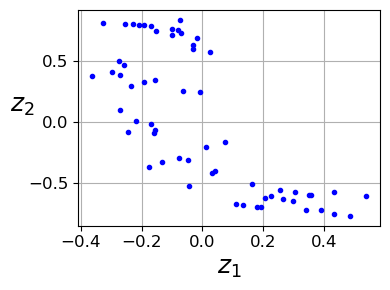

In [13]:
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow >= 2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)


np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

codings = encoder.predict(X_train)
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

## More advanced features, stacked AEs

In [14]:
# You can select the so-called fashion data as well, here we just use the MNIST standard set
#(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

We can now train all layers at once by building a stacked AE with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [15]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 19s 10ms/step - loss: 0.1782 - rounded_accuracy: 0.9218 - val_loss: 0.1391 - val_rounded_accuracy: 0.9438
Epoch 2/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1288 - rounded_accuracy: 0.9496 - val_loss: 0.1247 - val_rounded_accuracy: 0.9516
Epoch 3/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1188 - rounded_accuracy: 0.9552 - val_loss: 0.1155 - val_rounded_accuracy: 0.9574
Epoch 4/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1134 - rounded_accuracy: 0.9582 - val_loss: 0.1136 - val_rounded_accuracy: 0.9584
Epoch 5/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1106 - rounded_accuracy: 0.9598 - val_loss: 0.1106 - val_rounded_accuracy: 0.9598
Epoch 6/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1087 - rounded_accuracy: 0.9609 - val_loss: 0.1083 - val_rounded_accuracy: 0.9612
Epoch 7/20
1719/1719 [======

This function processes a few test images through the autoencoder and
displays the original images and their reconstructions.

1/1 [==============================] - 0s 419ms/step
Saving figure reconstruction_plot


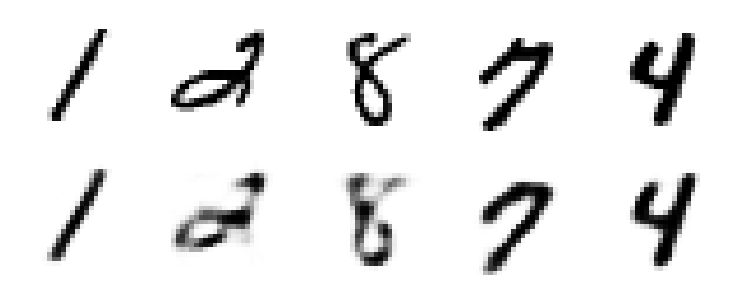

In [16]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

Then visualize

157/157 [==============================] - 0s 2ms/step


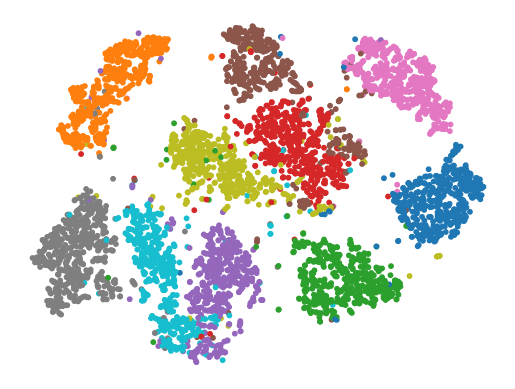

In [17]:
np.random.seed(42)
from sklearn.manifold import TSNE
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

And visualize in a nicer way

Saving figure fashion_mnist_visualization_plot


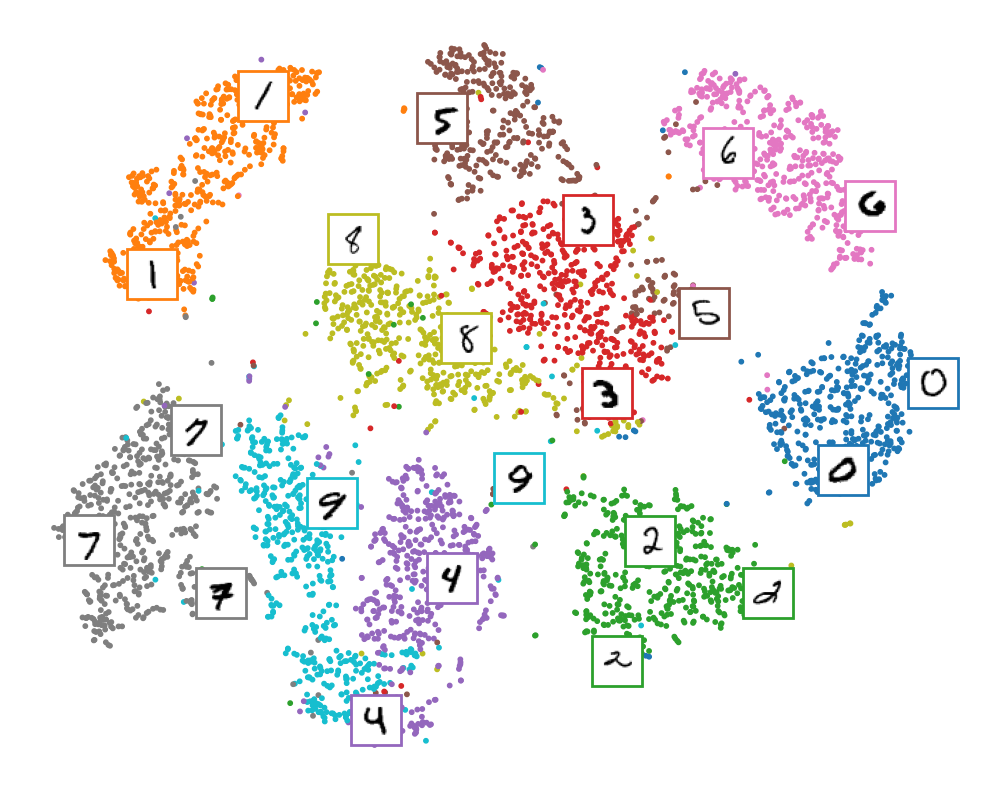

In [18]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

## Using Convolutional Layers Instead of Dense Layers

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 38s 21ms/step - loss: 0.1110 - rounded_accuracy: 0.9609 - val_loss: 0.0871 - val_rounded_accuracy: 0.9743
Epoch 2/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.0820 - rounded_accuracy: 0.9774 - val_loss: 0.0798 - val_rounded_accuracy: 0.9791
Epoch 3/5
1719/1719 [==============================] - 34s 20ms/step - loss: 0.0777 - rounded_accuracy: 0.9803 - val_loss: 0.0784 - val_rounded_accuracy: 0.9802
Epoch 4/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0755 - rounded_accuracy: 0.9818 - val_loss: 0.0753 - val_rounded_accuracy: 0.9822
Epoch 5/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0741 - rounded_accuracy: 0.9828 - val_loss: 0.0752 - val_rounded_accuracy: 0.9821


In [20]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)         

1/1 [==============================] - 0s 205ms/step


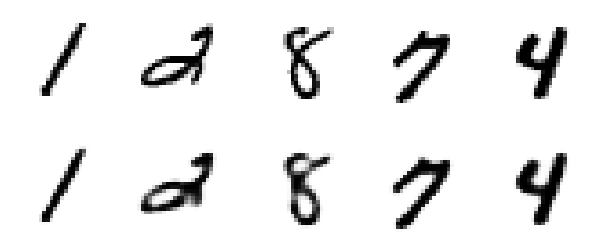

In [21]:
show_reconstructions(conv_ae)
plt.show()

## Recurrent Autoencoders

In [22]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 30s 16ms/step - loss: 0.3420 - rounded_accuracy: 0.8648 - val_loss: 0.3114 - val_rounded_accuracy: 0.8684
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3023 - rounded_accuracy: 0.8677 - val_loss: 0.2950 - val_rounded_accuracy: 0.8684
Epoch 3/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2806 - rounded_accuracy: 0.8676 - val_loss: 0.2726 - val_rounded_accuracy: 0.8671
Epoch 4/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2609 - rounded_accuracy: 0.8675 - val_loss: 0.2572 - val_rounded_accuracy: 0.8663
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2530 - rounded_accuracy: 0.8686 - val_loss: 0.2505 - val_rounded_accuracy: 0.8693
Epoch 6/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2491 - rounded_accuracy: 0.8703 - val_loss: 0.2474 - val_rounded_accuracy: 0.8713
Epoch 7/10
1719/1719 [======

1/1 [==============================] - 1s 734ms/step


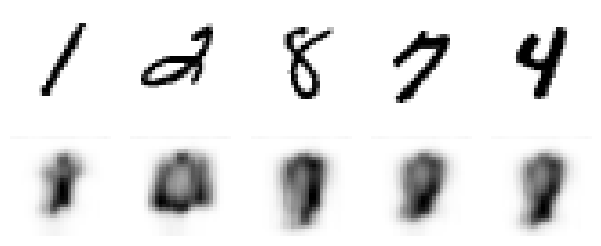

In [23]:
show_reconstructions(recurrent_ae)
plt.show()

## Stacked denoising Autoencoder with Gaussian noise

In [24]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1914 - rounded_accuracy: 0.9148 - val_loss: 0.1495 - val_rounded_accuracy: 0.9395
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1349 - rounded_accuracy: 0.9464 - val_loss: 0.1277 - val_rounded_accuracy: 0.9508
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1205 - rounded_accuracy: 0.9545 - val_loss: 0.1191 - val_rounded_accuracy: 0.9559
Epoch 4/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1140 - rounded_accuracy: 0.9581 - val_loss: 0.1131 - val_rounded_accuracy: 0.9591
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1095 - rounded_accuracy: 0.9607 - val_loss: 0.1091 - val_rounded_accuracy: 0.9614
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1057 - rounded_accuracy: 0.9629 - val_loss: 0.1051 - val_rounded_accuracy: 0.9636
Epoch 7/10
1719/1719 [========

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

And using dropout

In [25]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.2105 - rounded_accuracy: 0.9024 - val_loss: 0.1617 - val_rounded_accuracy: 0.9311
Epoch 2/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.1554 - rounded_accuracy: 0.9343 - val_loss: 0.1408 - val_rounded_accuracy: 0.9423
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1413 - rounded_accuracy: 0.9421 - val_loss: 0.1293 - val_rounded_accuracy: 0.9498
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1343 - rounded_accuracy: 0.9459 - val_loss: 0.1234 - val_rounded_accuracy: 0.9533
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1302 - rounded_accuracy: 0.9482 - val_loss: 0.1197 - val_rounded_accuracy: 0.9550
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1274 - rounded_accuracy: 0.9498 - val_loss: 0.1186 - val_rounded_accuracy: 0.9549
Epoch 7/10
1719/1719 [======

1/1 [==============================] - 0s 40ms/step
Saving figure dropout_denoising_plot


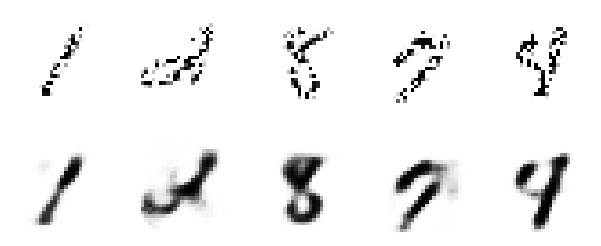

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)

## PyTorch example
We will continue with the MNIST database, which has $60000$ training examples and a test set of 10000 handwritten numbers. The images have
only one color channel and have a size of $28\times 28$ pixels.
We start by uploading the data set.

In [ ]:
# import the Torch packages
# transforms are used to preprocess the images, e.g. crop, rotate, normalize, etc
import torch
from torchvision import datasets,transforms

# specify the data path in which you would like to store the downloaded files
# ToTensor() here is used to convert data type to tensor

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)
print(train_dataset)
batchSize=128

#only after packed in DataLoader, can we feed the data into the neural network iteratively
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batchSize, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batchSize, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 9903034.40it/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 272114.15it/s]


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2983307.45it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1159496.58it/s]


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



We visualize the images here using the $imshow$ function  function and the $make\_grid$ function from PyTorch to arrange and display them.

In [ ]:
# package we used to manipulate matrix
import numpy as np
# package we used for image processing
from matplotlib import pyplot as plt
from torchvision.utils import make_grid

def imshow(img):
    npimg = img.numpy()
    #transpose: change array axis to correspond to the plt.imshow() function     
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

# load the first 16 training samples from next iteration
# [:16,:,:,:] for the 4 dimension of examples, first dimension take first 16, other dimension take all data
# arrange the image in grid
examples, _ = next(iter(train_loader))
example_show=make_grid(examples[:16,:,:,:], 4)

# then display them
imshow(example_show)

Our autoencoder consists of two parts, see also the TensorFlow example
above. The encoder and decoder parts are represented by two fully
connected feed forward neural networks where we use the standard
Sigmoid function.  In the encoder part we reduce the dimensionality of
the image from $28\times 28=784$ pixels to first $16\times 16=256$
pixels and then to 128 pixels. The 128 pixel representation is then
used to define the representation of the input and the input to the
decoder part.  The latter attempts to reconstruct the images.

In [31]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Network Parameters
num_hidden_1 = 256  # 1st layer num features
num_hidden_2 = 128  # 2nd layer num features (the latent dim)
num_input = 784  # MNIST data input (img shape: 28*28)


# Building the encoder
class Autoencoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2):
        super(Autoencoder, self).__init__()
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        # decoder part
        self.fc3 = nn.Linear(h_dim2, h_dim1)
        self.fc4 = nn.Linear(h_dim1, x_dim)

    def encoder(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def decoder(self, x):
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# When initializing, it will run __init__() function as above
model = Autoencoder(num_input, num_hidden_1, num_hidden_2)

We define here the cost/loss function and the optimizer we employ (Adam here).

In [32]:
# define loss function and parameters
optimizer = optim.Adam(model.parameters())
epoch = 100
# MSE loss will calculate Mean Squared Error between the inputs 
loss_function = nn.MSELoss()

print('====Training start====')
for i in range(epoch):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        # prepare input data
        inputs = torch.reshape(data,(-1, 784)) # -1 can be any value.
        # set gradient to zero
        optimizer.zero_grad()
        # feed inputs into model
        recon_x = model(inputs)
        # calculating loss 
        loss = loss_function(recon_x, inputs)
        # calculate gradient of each parameter
        loss.backward()
        train_loss += loss.item()
        # update the weight based on the gradient calculated
        optimizer.step()
    if i%10==0:    
        print('====> Epoch: {} Average loss: {:.9f}'.format(i, train_loss ))
print('====Training finish====')

As we have trained the network, we will now reconstruct various test samples to see if the model can generalize to data which
were not included in the training set.

In [33]:
# load 16 images from testset
inputs, _ = next(iter(test_loader))
inputs_example = make_grid(inputs[:16,:,:,:],4)
imshow(inputs_example)

#convert from image to tensor
#inputs=inputs.cuda()
inputs=torch.reshape(inputs,(-1,784))

# get the outputs from the trained model
outputs=model(inputs)

#convert from tensor to image
outputs=torch.reshape(outputs,(-1,1,28,28))
outputs=outputs.detach().cpu()

#show the output images
outputs_example = make_grid(outputs[:16,:,:,:],4)
imshow(outputs_example)

After training the auto-encoder, we can now use the model to reconstruct some images.
In order to reconstruct different training images, the model
has learned to recognize how the image looks like and describe it in
the 128-dimensional  latent space. In other words, the visual information of
images is compressed and encoded in the 128-dimensional representations. As we
assume that samples from the same categories should be more visually
similar than those from different classes, the representations can
then be used for image recognition, i.e., handwritten digit images
recognition in our case.

One simple way to recognize images is to randomly select ten training
samples from each class and annotate them with the corresponding label.
Then given the
test data, we can predict which classes they belong to by finding the
most similar labelled training samples to them.

In [34]:
# get 100 image-label pairs from training set
x_train, y_train = next(iter(train_loader))

# 10 classes, 10 samples per class, 100 in total
candidates = np.random.choice(batchSize, 10*10)

# randomly select 100 samples
x_train = x_train[candidates]
y_train = y_train[candidates]

# display the selected samples and print their labels

imshow(make_grid(x_train[:100,:,:,:],10))
print(y_train.reshape(10, 10))

# get 100 image-label pairs from test set
x_test, y_test = next(iter(train_loader))
candidates_test = np.random.choice(batchSize, 10*10)

x_test = x_test[candidates_test]
y_test = y_test[candidates_test]

# display the selected samples and print their labels
imshow(make_grid(x_test[:100,:,:,:],10))

print(y_test.reshape(10, 10))

In [35]:
# compute the representations of training and test samples
#h_train=model.encoder(torch.reshape(x_train.cuda(),(-1,784)))
#h_test=model.encoder(torch.reshape(x_test.cuda(),(-1,784)))
h_train=model.encoder(torch.reshape(x_train,(-1,784)))
h_test=model.encoder(torch.reshape(x_test,(-1,784)))

# find the nearest training samples to each test instance, in terms of MSE
MSEs = np.mean(np.power(np.expand_dims(h_test.detach().cpu(), axis=1) - np.expand_dims(h_train.detach().cpu(), axis=0), 2), axis=2)
neighbours = MSEs.argmin(axis=1)
predicts = y_train[neighbours]

# print(np.stack([y_test, predicts], axis=1))
print('Recognition accuracy according to the learned representation is %.1f%%' % (100 * (y_test == predicts).numpy().astype(np.float32).mean()))